# Medical Cost Insurance

In [257]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [258]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [259]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [260]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [261]:
df.shape

(1338, 7)

In [262]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [263]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [265]:
#Statistical Summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [266]:
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [267]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [268]:
#Correlation
dfcor=df.corr()
dfcor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:xlabel='age', ylabel='charges'>

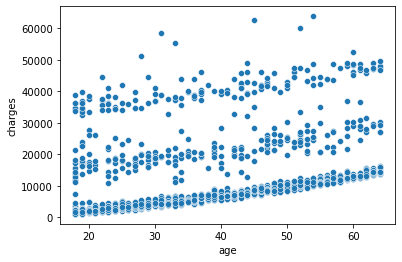

In [269]:
#Scatterplot
sns.scatterplot(x='age',y='charges',data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

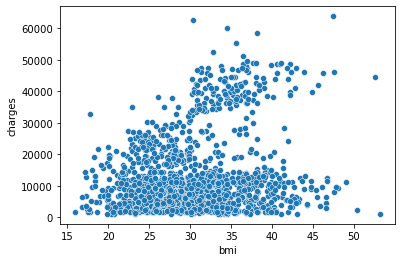

In [270]:
sns.scatterplot(x='bmi',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

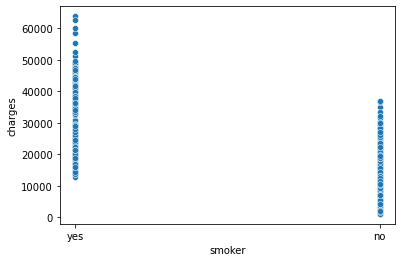

In [271]:
sns.scatterplot(x='smoker',y='charges',data=df)

In [272]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [273]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [274]:
df['charges'].nunique()

1337

In [275]:
df.shape[0]

1338

In [276]:
df.shape[1]

7

# Making dataframe for the nominal data

In [277]:
df_visualization_nominal=df[['age','sex','bmi','children','smoker','region','charges']].copy()

In [278]:
df_visualization_nominal.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualization of the data

In [279]:
import seaborn as sns

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


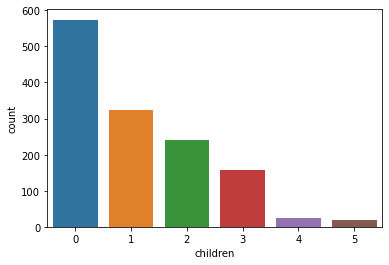

In [280]:
a=sns.countplot(x='children',data=df_visualization_nominal)
print(df_visualization_nominal['children'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


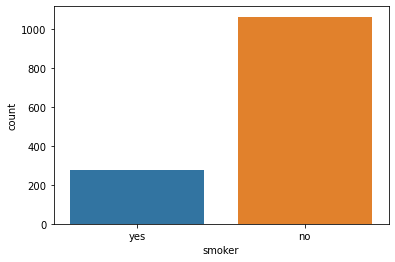

In [281]:
a=sns.countplot(x='smoker',data=df_visualization_nominal)
print(df_visualization_nominal['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


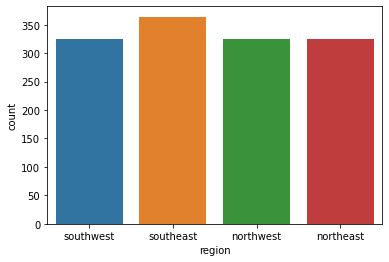

In [282]:
a=sns.countplot(x='region',data=df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64


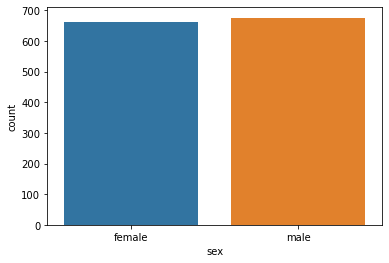

In [283]:
a=sns.countplot(x='sex',data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

# Making dataframe of the ordinal data

In [284]:
df_visualization_ordinal=df[['children','charges']].copy()

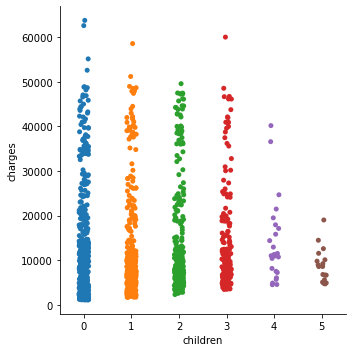

In [285]:
sns.catplot(x='children',y='charges',data=df)

In [286]:
df_visualization_ordinal=df[['smoker','charges']].copy()

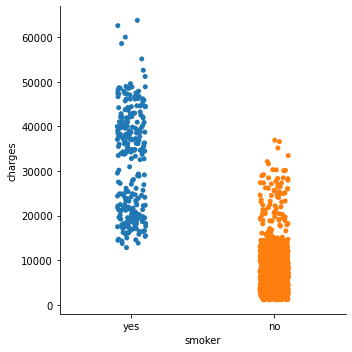

In [287]:
sns.catplot(x='smoker',y='charges',data=df)

In [288]:
df_visualization_ordinal=df[['sex','charges']].copy()

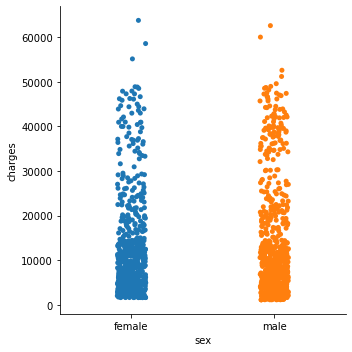

In [289]:
sns.catplot(x='sex',y='charges',data=df)

In [290]:
df_visualization_ordinal=df[['region','charges']].copy()

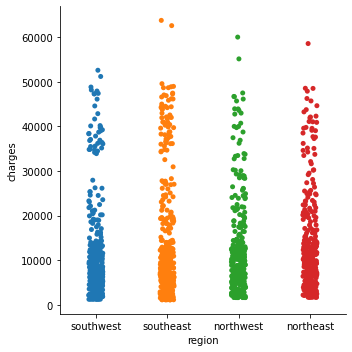

In [291]:
sns.catplot(x='region',y='charges',data=df)

In [292]:
#categorical data
#Sex, region and smoke

In [294]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)  
#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace = True)
#endoing region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Distribution Curve

In [295]:
df_visualization_continuous=df[['charges']].copy()

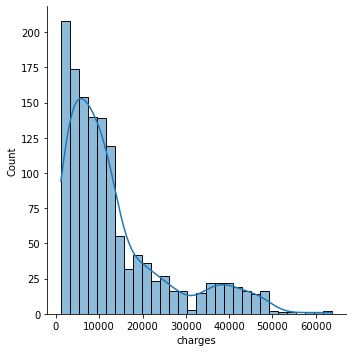

In [296]:
import seaborn as sns
sns.displot(df_visualization_continuous['charges'],kde=True)

In [297]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:>

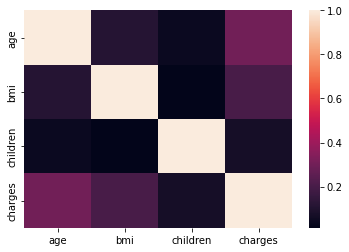

In [298]:
sns.heatmap(dfcor)

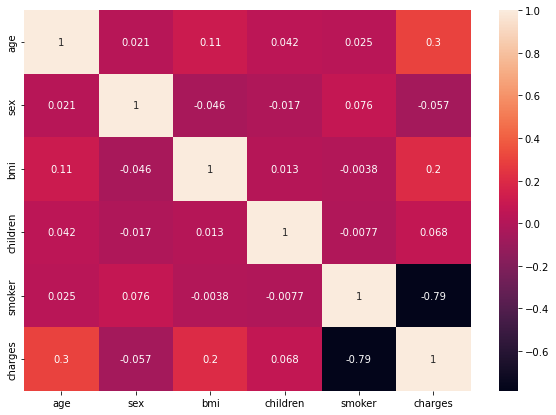

In [311]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [308]:
X=df.drop(columns='charges',axis=1)
y=df['charges']

In [310]:
print(X)

      age  sex     bmi  children  smoker     region
0      19    1  27.900         0       0  southwest
1      18    0  33.770         1       1  southeast
2      28    0  33.000         3       1  southeast
3      33    0  22.705         0       1  northwest
4      32    0  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    0  30.970         3       1  northwest
1334   18    1  31.920         0       1  northeast
1335   18    1  36.850         0       1  southeast
1336   21    1  25.800         0       1  southwest
1337   61    1  29.070         0       0  northwest

[1338 rows x 6 columns]


In [316]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [319]:
X_train, X_test, y_train, y_test= train_test_split (X,y, test_size=0.2, random_state=40)
print(X.shape, X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [320]:
linreg=LinearRegression()

In [323]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [324]:
reg.fit(X_train,y_train)

ValueError: could not convert string to float: 'southwest'